# AVIAN INFLUENZA IN IRELAND: MACHINE LEARNING MODELS
## Dealing with severe class imbalance

### Data set
This dataset was retrieved from [Kaggle](https://www.kaggle.com/datasets/jasmeet0516/bird-flu-dataset-avian-influenza). The dataset includes information about bird species captured in Ireland from 1980 to 2020 who were then tested for avian influenza. Characteristics include name, date, specific location details, parent specieis, and presence (1) or absence (0) of HPAI. The dataset has 17 columns and 16,304 entries. 


### Project Summary and Significance 
Avian influenza (also referred to as H5, HPAI, or bird flu) is a viral disease found in birds. Migratory birds, specifically waterfowl, are major hosts to the virus and often responsible for spreading it across large geographical areas. When outbreaks occur in domestic birds, often the protocol is to cull all the poultry, infected and healthy, to contain the spread. Avian influenza poses not only a devastating threat to the health of domestic and wild birds, but also has consequences for the poulty industry, livelihoods, and international trade. In addition, avian influenza can sometimes spillover into humans, giving it pandemic potential, meaning it also poses as a public health concern ([World Organization for Animal Health, 2024](https://www.woah.org/en/disease/avian-influenza/)). 

The ability to look at characteristics such as bird species, parent specieis, bird location, and time of year and predict the liklihood of birds carrying avian influenza could be incredibly useful in providing valuable insights and significantly enhancing our ability to control and prevent outbreaks. Practical applications include guiding targeting surveillance, outbreak prediction and prevention, resource allocation, and providing a foundation for further epidemiological studies. I wanted to do something like this as I became fascinated with zoonotic diseases during my Masters in Peace Studies, where I conducted thesis research.... which was published in PLOSONE.

**Purpose/Goal:** To implement classification machine learning models to predict presence of HPAI in birds in Ireland

**Tools:**
    Python
        Pandas, Scikit-learn, Matplotlib & Seaborn, ColumnTransformer, make_pipeline, StandardScaler,  
        OneHotEncoder etc...

**Methods:**
    Data Preprocessing: Handling missing values, encoding categorical features, and scaling numeric features to
        improve model performance.
    Class Imbalance Handling: Since the dataset was imbalanced (with more negative cases), I used techniques 
        such as grouping to create less values and class weighting mechanisms within the models to balance the 
        target classes. In early versions I also tried SMOTE and under-sampling, but they did not make much of a
        difference so I left that out here.
    Model Training: I trained and evaluated three models: Random Forest, Logistic Regression, and XGBoost
    Model Evaluation: I used cross-validation to assess the models' generalization capabilities, focusing on 
        metrics such as accuracy, ROC-AUC, precision, recall, and F1-score.
    Voting Classifier: I also implemented a Voting Classifier combining the predictions from the three 
        individual models, aiming to improve accuracy and robustness.

**Results:**
   Random Forest:
        Accuracy: 99.42%
        ROC-AUC: 0.99
        Recall: 98.1%
        Precision: 98.4%
        F1-Score: 98.3%

    Logistic Regression:
        Accuracy: 98.87%
        ROC-AUC: 0.99
        Recall: 99.8%
        Precision: 93.5%
        F1-Score: 96.5%

    XGBoost:
        Accuracy: 99.48%
        ROC-AUC: 0.99
        Recall: 99.4%
        Precision: 97.3%
        F1-Score: 98.4%

    Voting Classifier:
        Accuracy: 99.42%
        ROC-AUC: 0.99
        Recall: 99.4%
        Precision: 97.0%
        F1-Score: 98.2%

The results were very close between all models, with the Voting Classifier slightly outperforming the others in terms of recall and precision, indicating that combining the models helped improve robustness.

**Key Lessons:** I learned the most through this personal project about imbalanced class data handling. I became familiar with different methods to handle this, including grouping, class_weights, SMOTE, and under-sampling. I also learned more about dealing with overfitting models and how using a Voting Classifier showed how combining multiple models can enhance performance by improving generalization. I was still concerned about overfitting, especially when I ran a fake bird through my model and it predicted it as negative incorrectly, but I learned how to test the models through cross-validation which helped confirm that the models were not overfitting to the training data. Though, quite frankly, I do think though the models have performed well, I think they need further hyperparameter tuning to make sure they are not overfitting to the majority data. Therefore, in the future, I would want to take this further and adjust hyperparameters and see if this made a difference.

**Personal Growth:** After taking a machine learning class in my graduate program, I wanted to try out some machine learning firsthand in relation to an area I am passionate about - zoonotic diseases. This project was an opportunity to deepen my understanding of machine learning models, particularly in terms of classification, handling imbalanced datasets, and model evaluation. I also gained hands-on experience with ensemble learning, which helped me appreciate the power of combining multiple models to improve predictive performance. Working on this project enhanced my ability to select and evaluate models based on their strengths and the specific nature of the problem, and I’m excited to apply these skills to future projects.


### Getting Familiar with the Data

In [38]:
#standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import the data
hpai = pd.read_csv('Avian Influenza (HPAI).csv')

In [8]:
# check data
hpai.info()
# 16304 rows, 17 columns, only county appears to have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   16304 non-null  int64  
 1   Scientific_Name       16304 non-null  object 
 2   Common_Name           16304 non-null  object 
 3   Date                  16304 non-null  object 
 4   Year                  16304 non-null  int64  
 5   Month                 16304 non-null  int64  
 6   Day                   16304 non-null  int64  
 7   Time                  16304 non-null  int64  
 8   Country               16304 non-null  object 
 9   Country_State_County  16304 non-null  object 
 10  State                 16304 non-null  object 
 11  County                16175 non-null  object 
 12  Locality              16304 non-null  object 
 13  Latitude              16304 non-null  float64
 14  Longitude             16304 non-null  float64
 15  Parent_Species     

In [10]:
hpai.head()

,_id,Scientific_Name,Common_Name,Date,Year,Month,Day,Time,Country,Country_State_County,State,County,Locality,Latitude,Longitude,Parent_Species,target_H5_HPAI
0,1,Acrocephalus scirpaceus,Eurasian Reed Warbler,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Acrocephalus scirpaceus,0
1,2,Acrocephalus scirpaceus,Eurasian Reed Warbler,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Acrocephalus scirpaceus,0
2,3,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0
3,4,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0
4,5,Limosa haemastica,Hudsonian Godwit,2015-09-15T00:00:00,2015,9,15,1100,Ireland,IE-C-GY,Connaught,Galway,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0


In [12]:
#get value counts and get an idea of our variables
for column in hpai.columns:
    value_counts = hpai[column].value_counts()
    print(value_counts)
    print("\n")  # this is nice becasue it adds a line between each col results to make it easier to read

# key takeaways: 
    ## country is only ireland so likely can drop that
    ## most of the columns have many possible inputs
    ## time and date cols are likely un-necessary especially given we have day, month, year cols
    ## seems to be severe class imbalance in our target HPAI.

_id
1        1
10875    1
10862    1
10863    1
10864    1
        ..
5440     1
5441     1
5442     1
5443     1
16304    1
Name: count, Length: 16304, dtype: int64


Scientific_Name
Erithacus rubecula                   420
Chroicocephalus ridibundus           332
Corvus frugilegus                    278
Larus argentatus                     276
Cygnus olor                          273
                                    ... 
Melanitta fusca                        1
Saxicola maurus                        1
Anas crecca crecca x carolinensis      1
Chordeiles minor                       1
Numenius phaeopus/arquata              1
Name: count, Length: 410, dtype: int64


Common_Name
European Robin                             420
Black-headed Gull                          332
Rook                                       278
Herring Gull                               276
Mute Swan                                  273
                                          ... 
Velvet Scoter                 

In [16]:
{
    "tags": [
        "hide-output"
    ]
}

#let's see how many species of birds there are 
#pd.set_option('display.max_rows', None)  # none means no limit on rows to display so we can see them all
hpai['Scientific_Name'].value_counts()
print(species_counts)
# there are over 400 - may be good to group them by genus. we can address this with our feature engineering

Scientific_Name
Erithacus rubecula                   420
Chroicocephalus ridibundus           332
Corvus frugilegus                    278
Larus argentatus                     276
Cygnus olor                          273
                                    ... 
Melanitta fusca                        1
Saxicola maurus                        1
Anas crecca crecca x carolinensis      1
Chordeiles minor                       1
Numenius phaeopus/arquata              1
Name: count, Length: 410, dtype: int64


In [18]:
{
    "tags": [
        "hide-output"
    ]
}

# get locality values
hpai['Locality'].value_counts()

#there are 1288 unique values - we can address this with feature engineering as well. 

Locality
Rogerstown Estuary--Turvey Hide    464
East Coast NR                      438
Rogerstown Estuary--North Hide     381
St. Stephen's Green                376
Lough Atalia                       331
                                  ... 
St Patrick's Well                    1
Beenoskee B&B                        1
Inch Waterfowl Reserve               1
Schull (Town)                        1
KG                                   1
Name: count, Length: 1288, dtype: int64

In [20]:
# assess missing values, which we knew from above only county has
hpai.isna().sum()

_id                       0
Scientific_Name           0
Common_Name               0
Date                      0
Year                      0
Month                     0
Day                       0
Time                      0
Country                   0
Country_State_County      0
State                     0
County                  129
Locality                  0
Latitude                  0
Longitude                 0
Parent_Species            0
target_H5_HPAI            0
dtype: int64

In [22]:
# now let's adjust our df based on what we've seen so far:
    ## we can drop: _id as it is not needed
    ## drop common_name as it is redundant
    ## drop date and time, we have other info for that and to keep it simple and better for seasonality eval
    ## drop country as it is only ireland
    ## drop county as we have other geographical info without missing values

hpai = hpai.drop(['_id','Common_Name', 'Date','Time','Country','County'], axis=1)

In [24]:
hpai.head()

,Scientific_Name,Year,Month,Day,Country_State_County,State,Locality,Latitude,Longitude,Parent_Species,target_H5_HPAI
0,Acrocephalus scirpaceus,2015,9,15,IE-C-GY,Connaught,Inishmore (Inis M�r),53.1291,-9.7507,Acrocephalus scirpaceus,0
1,Acrocephalus scirpaceus,2015,9,15,IE-C-GY,Connaught,Inishmore (Inis M�r),53.1291,-9.7507,Acrocephalus scirpaceus,0
2,Limosa haemastica,2015,9,15,IE-C-GY,Connaught,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0
3,Limosa haemastica,2015,9,15,IE-C-GY,Connaught,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0
4,Limosa haemastica,2015,9,15,IE-C-GY,Connaught,Inishmore (Inis M�r),53.1291,-9.7507,Limosa haemastica,0


#### Summary of Initial Investigation

Our label is our target variable, which is target_H5_HPAI. it is binary with 1 being presence of HPAI and 0 being absence. 

Our features are both numerical and categorical.
Numerical: Year, Month, Day, Latitude, and Longitude (5)
Categorical: Scientific Name, Country_State_County, State, Locality, Parent Species (5)

Given the categorical features all have multiple inputs with no specific ordinal order, these are all nominal.


### Exploratory Data Analysis

Next we'll do a brief EDA of the data to get insight into the variable relationships. It will be a bit more difficult and perhaps limited given many of features have so many possible values.

In [29]:
# divide by dtype to facilitate analysis 
hpai_numeric = hpai[['Year', 'Month', 'Day', 'Latitude', 'Longitude']]

hpai_nominal = hpai[['Scientific_Name', 'Country_State_County', 'State', 'Locality', 'Parent_Species']]

In [31]:
# describe our numeric variables
round(hpai_numeric.describe(), 2)


## key take-aways:
    ## mean year is 2017 meaning most data is more recent 
    ## summer months seems to be the most frequent months birds were sampled
    ## lat / long ranges give us good idea of geographical area of sampling

,Year,Month,Day,Latitude,Longitude
count,16304.00,16304.00,16304.00,16304.00,16304.00
mean,2017.01,6.71,15.96,53.03,-7.68
std,2.45,2.98,8.45,0.75,1.59
min,1980.00,1.00,1.00,49.73,-15.35
25%,2016.00,5.00,9.00,52.52,-9.08
50%,2018.00,7.00,16.00,53.27,-6.90
75%,2019.00,9.00,23.00,53.39,-6.20
max,2020.00,12.00,31.00,55.37,-6.00


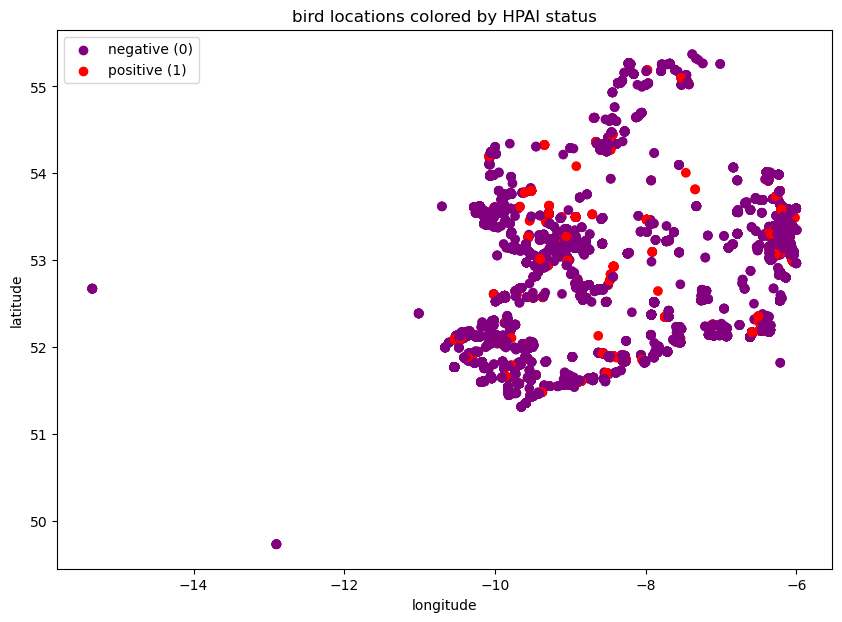

In [68]:
# let's see the geographical distribution of HPAI 
colors = hpai['target_H5_HPAI'].map({0: 'purple', 1: 'red'})  # blue for 0, red for 1

plt.figure(figsize=(10, 7))
plt.scatter(hpai['Longitude'], hpai['Latitude'], c=colors, marker='o')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("bird locations colored by HPAI status")

#legend info
plt.scatter([], [], color='purple', label='negative (0)')
plt.scatter([], [], color='red', label='positive (1)')
plt.legend()

plt.show()

/var/folders/y2/lmbpyrsd7zs8b6rb8z5sv6sh0000gn/T/ipykernel_43681/1483897154.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(hpai[column], ax=axes[i], kde=True, palette='BuPu')
/var/folders/y2/lmbpyrsd7zs8b6rb8z5sv6sh0000gn/T/ipykernel_43681/1483897154.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(hpai[column], ax=axes[i], kde=True, palette='BuPu')
/var/folders/y2/lmbpyrsd7zs8b6rb8z5sv6sh0000gn/T/ipykernel_43681/1483897154.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(hpai[column], ax=axes[i], kde=True, palette='BuPu')
/var/folders/y2/lmbpyrsd7zs8b6rb8z5sv6sh0000gn/T/ipykernel_43681/1483897154.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(hpai[column], ax=axes[i], kde=True, palette='BuPu')
/var/folders/y2/lmbpyrsd7zs8b6rb8z5sv6sh0000gn/T/ipykernel_43681/1483897154.py:14: UserWarni

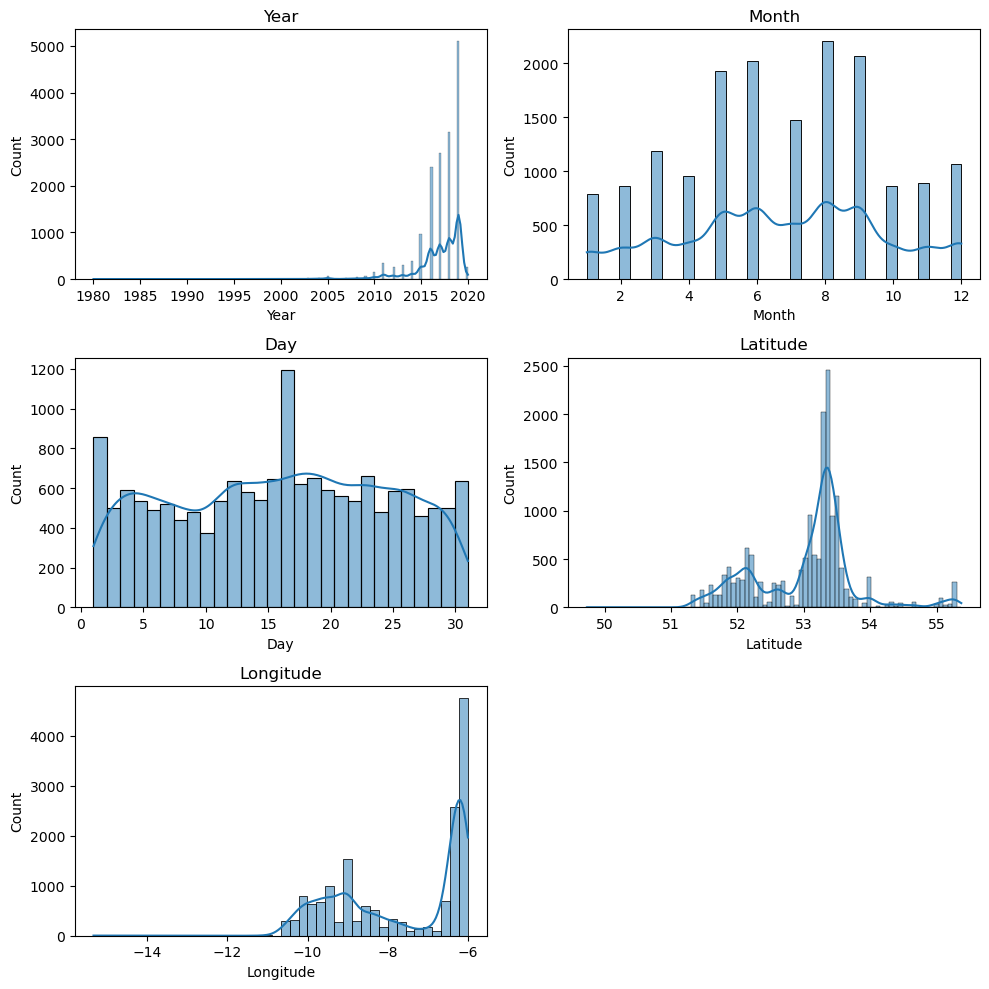

In [64]:
#a) numeric variables
# - univariate graphs. i've chosen histograms to get a look at the overall distrubution, as i feel box plots
## may be redundant since we've gotten much of that information above with .describe()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
fig, axes = plt.subplots(3,2, figsize=(10,10)) 

axes=axes.flatten()
#converts 2d array into 1d to make it easier to iterate over when plotting

for i, column in enumerate(hpai_numeric):
    # for i in enum, look through each numeric col
    ## enumerate makes sure it will get both the index and the col name.
    sns.histplot(hpai[column], ax=axes[i], kde=True)
    #make histograms (ax=axes[i] specifies suboplot)
    #kde = True provides a smoothed line estimate of the distribution
    axes[i].set_title(column)
    #title of each subplot is the column name

for j in range(i + 1, len(axes)):  
    axes[j].axis('off') #hide un-used subplots 
    
plt.tight_layout()
plt.show()


## key takeaways similiar to above with describe.

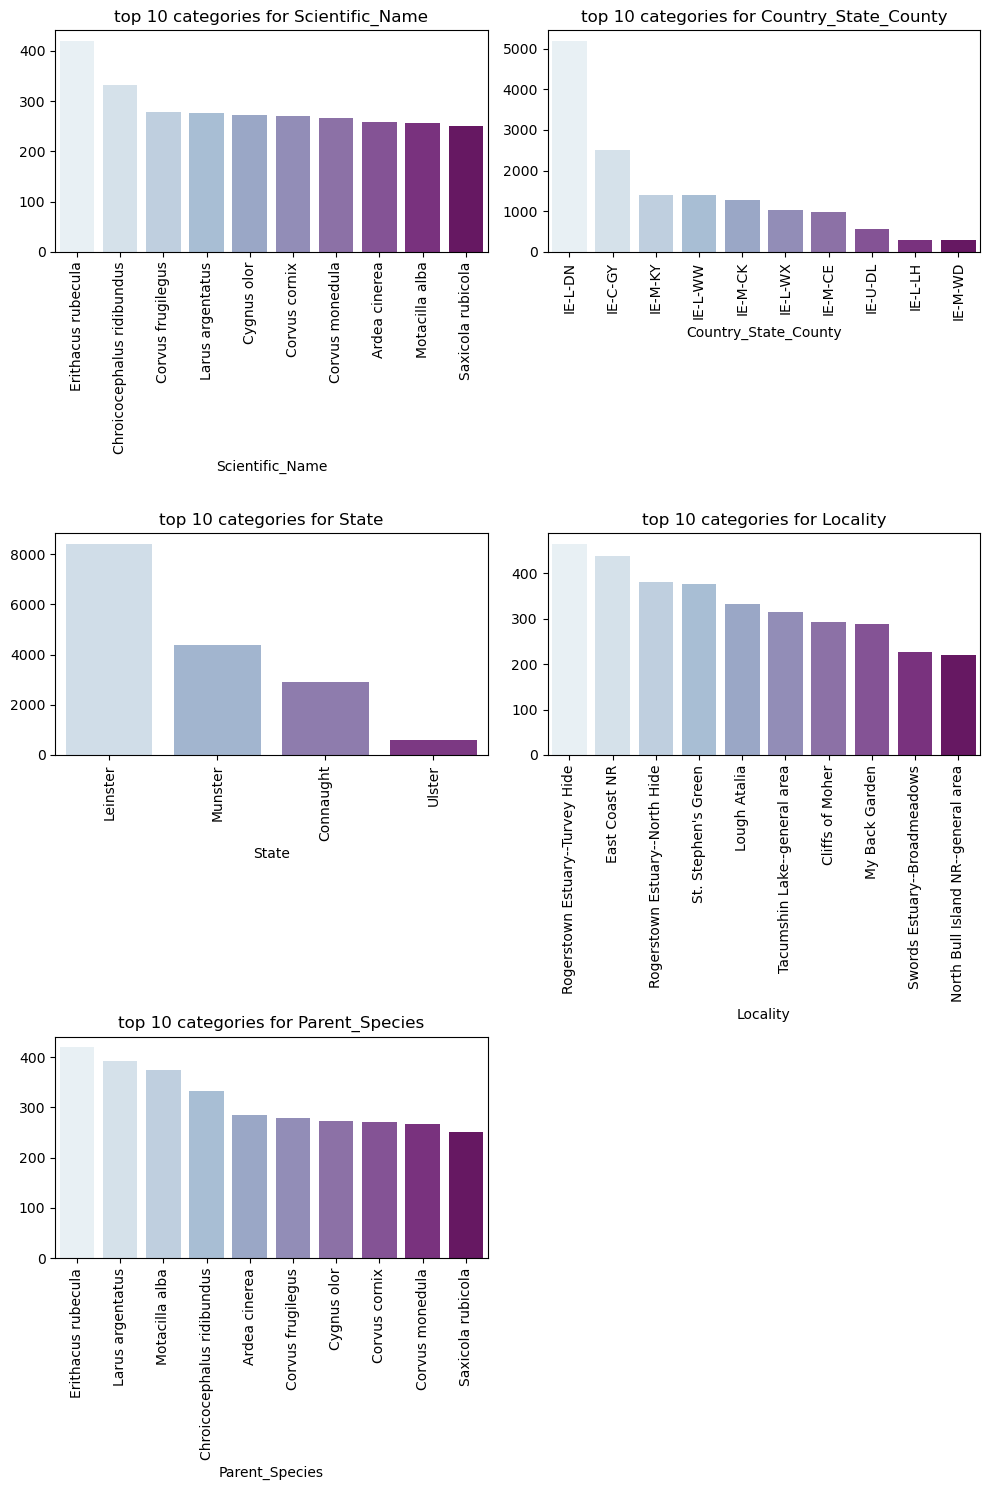

In [60]:
#let's look at our nominal variables. 
fig, axes = plt.subplots(3,2, figsize=(10,15)) 

axes=axes.flatten()

for i, col in enumerate(hpai_nominal):
    # let's get the top 10 categories by count because there are too many unique values, like for bird species 
    category_counts = hpai_nominal[col].value_counts().head(10)
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[i], palette='BuPu')
    axes[i].set_title(f'top 10 categories for {col}')
    axes[i].tick_params(axis='x', rotation=90)  

for j in range(i + 1, len(axes)):  
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## key takeaways: 
    ## most common bird sampled was erithacus rubecula, most sampled site IE-L-DN, with Lenister
       ##the most common state,
    ## not unexpectly, correlation between bird and parent species, and parent species most commonly being ER

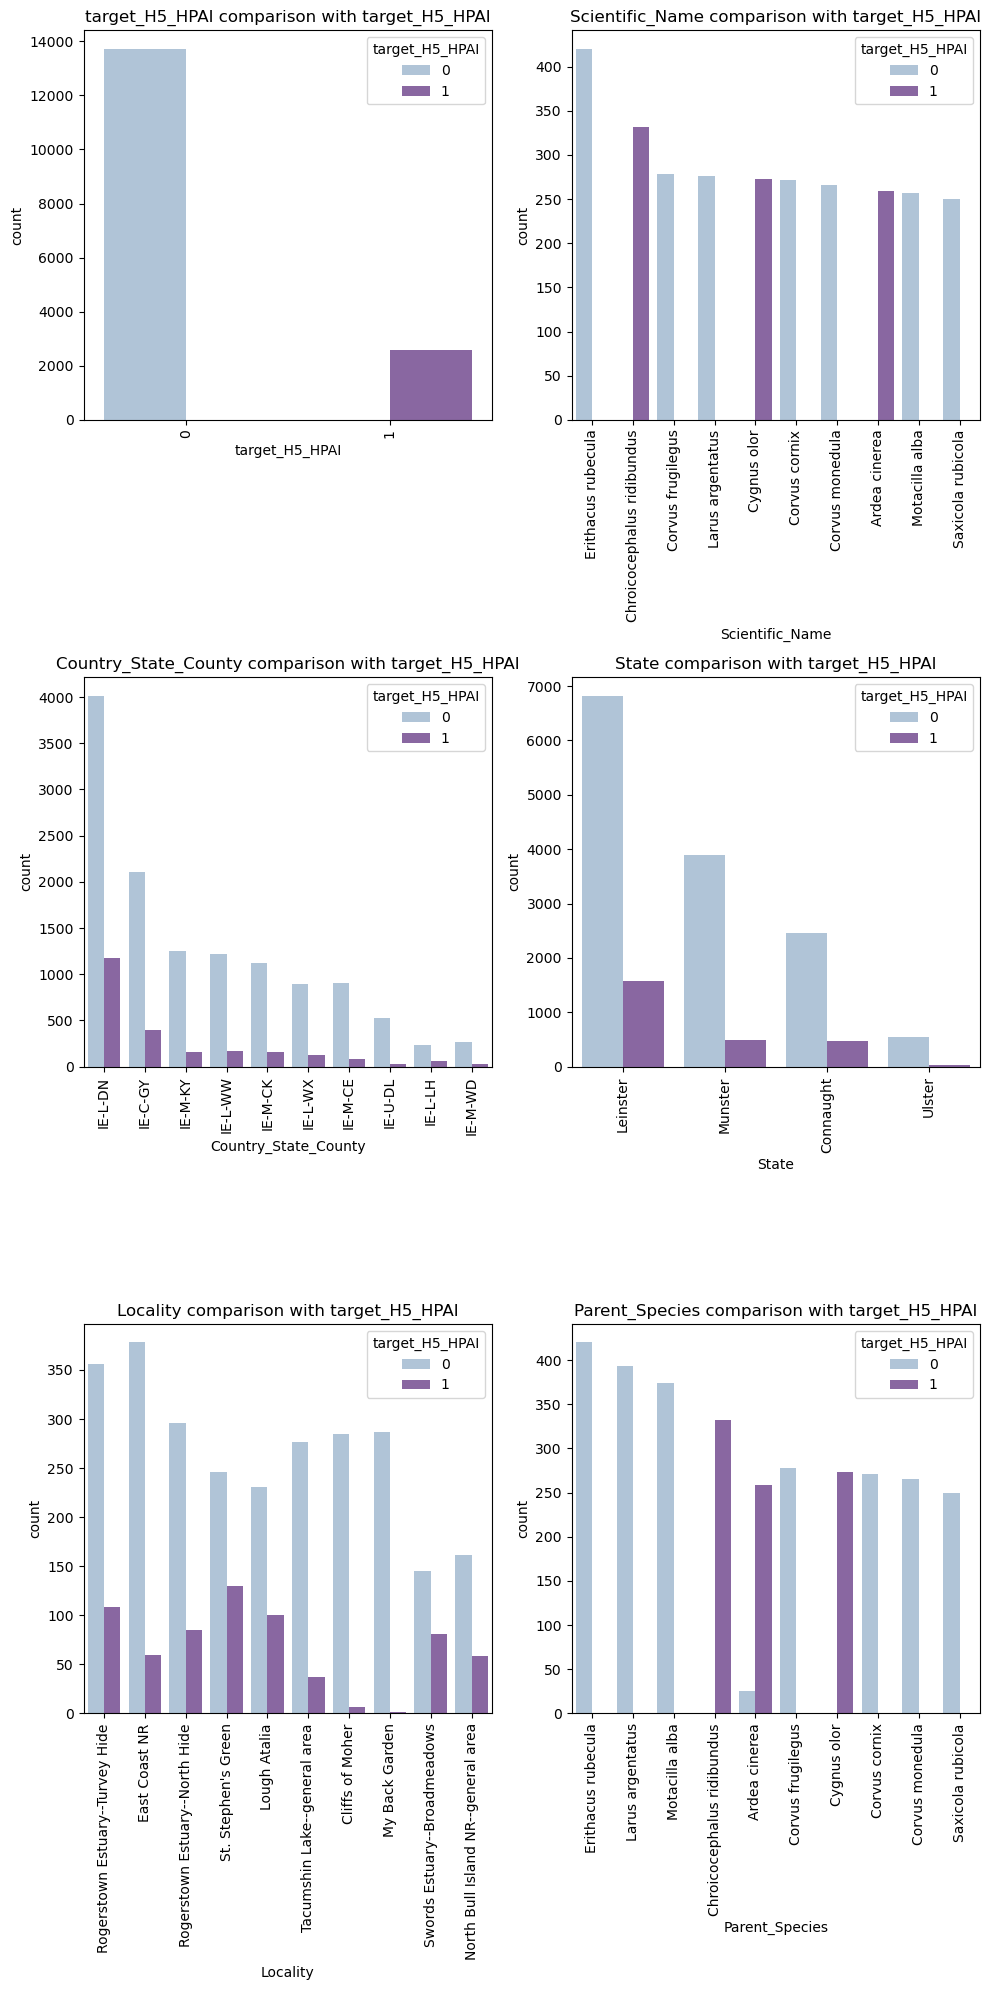

In [84]:
# bi-variate analysis of cat vars with target 
# going to create a copy of the dataframe and ensure target_H5_HPAI is categorical (or string)
hpai_copy = hpai.copy()
hpai_copy['target_H5_HPAI'] = hpai_copy['target_H5_HPAI'].astype('string') 
hpai_copy_nominal = ['target_H5_HPAI', 'Scientific_Name', 'Country_State_County', 'State', 'Locality', 'Parent_Species']

fig, axes = plt.subplots(3, 2, figsize=(10, 20)) 
axes = axes.flatten()  


for i, col in enumerate(hpai_copy_nominal):
    category_counts = hpai_copy[col].value_counts().head(10) #only top 10 again
    sns.countplot(x=col, hue="target_H5_HPAI", data=hpai_copy, order=category_counts.index, palette="BuPu", ax=axes[i])
    axes[i].set_title(f'{col} comparison with target_H5_HPAI')
    axes[i].tick_params(axis='x', rotation=90)  


plt.tight_layout()
plt.show()

## key takeaways:
    ## we can see the severe class imbalance in our target variable, the minority being positive cases
    ## some birds have almost equal incidences of presence and absence


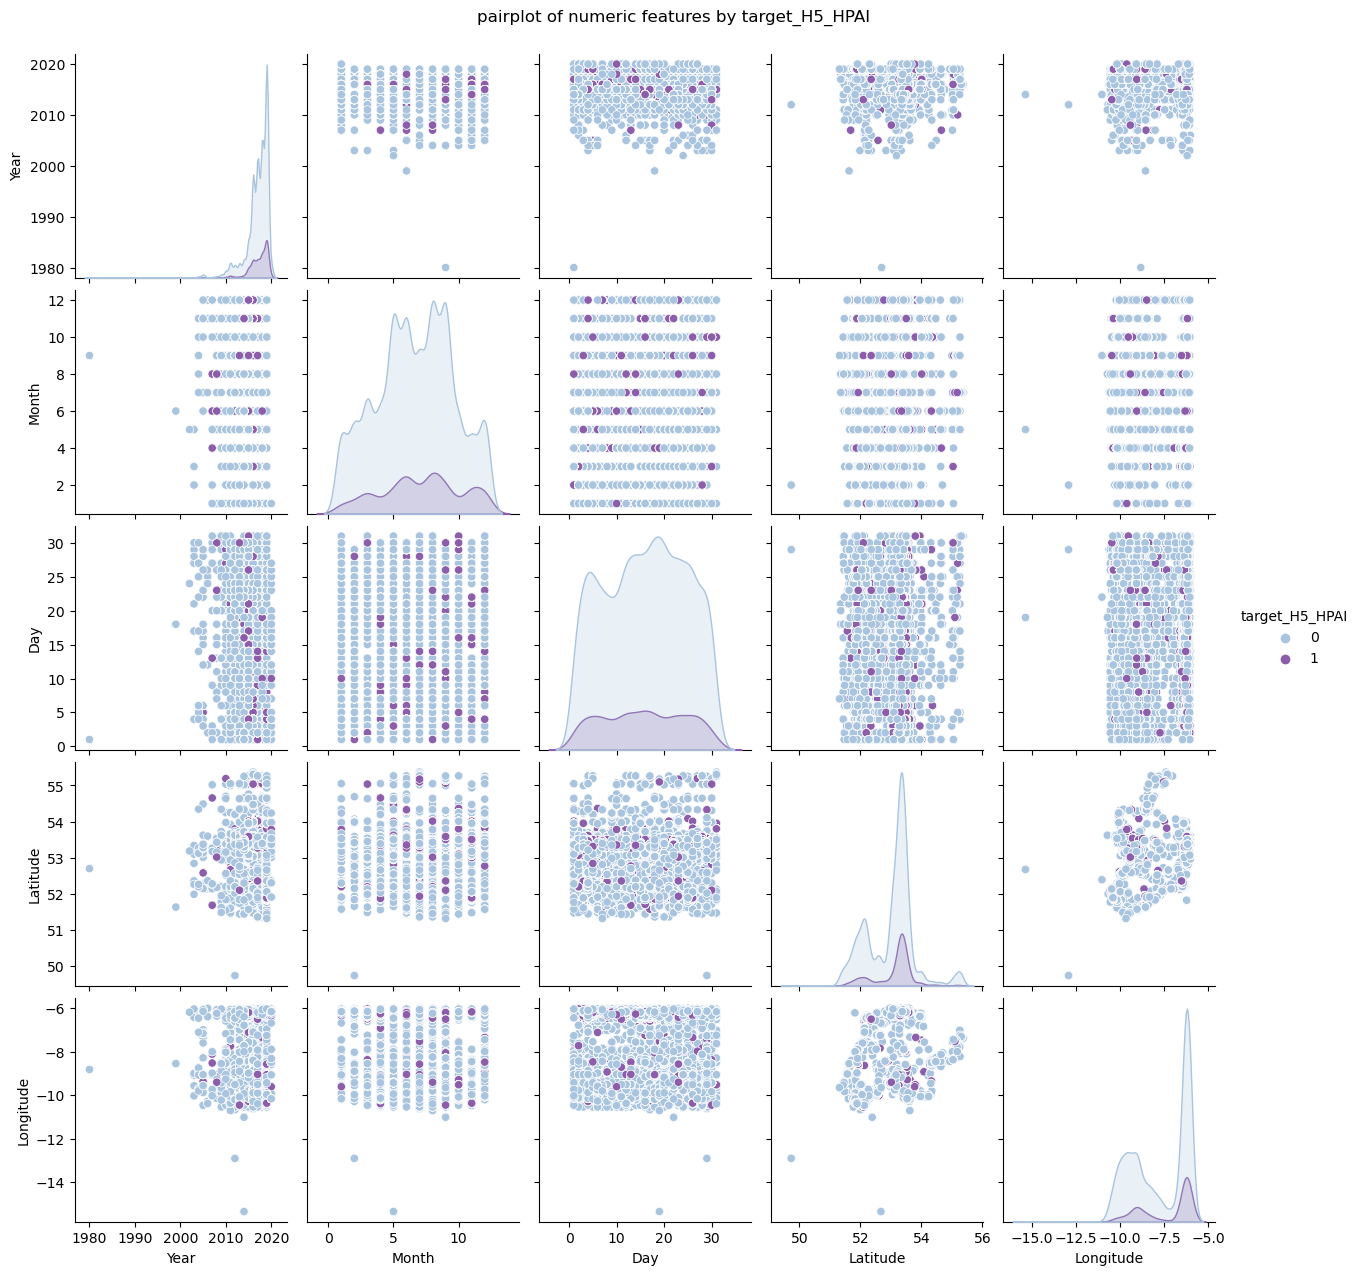

In [86]:
#pair plot to look at numeric vars and target vars
warnings.filterwarnings('ignore', category=FutureWarning)
hpai_numeric['target_H5_HPAI'] = hpai_copy['target_H5_HPAI']

sns.pairplot(hpai_numeric, hue="target_H5_HPAI", palette="BuPu")
plt.suptitle('pairplot of numeric features by target_H5_HPAI', y=1.02)  
plt.show()


In [89]:
### correlation checks
# nominal and binary outcome - use chi2
from scipy.stats import chi2_contingency

# Loop through each categorical feature
for col in hpai_nominal:
    contingency_table = pd.crosstab(hpai_copy[col], hpai_copy['target_H5_HPAI'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"chi-square test for {col} vs target_H5_HPAI:")
    print(f"chi2 Value: {chi2}")
    print(f"p-Value: {p_value}")
    print(f"df: {dof}")
    print("--------------------------------------------------")

## key takeaways:
    ## all tests have significant p values, so likely statistically sig relationships - 
    ## each one likely to have predictive value
   

chi-square test for Scientific_Name vs target_H5_HPAI:
chi2 Value: 16304.000000000004
p-Value: 0.0
df: 409
--------------------------------------------------
chi-square test for Country_State_County vs target_H5_HPAI:
chi2 Value: 411.75689387323
p-Value: 4.978109102460578e-71
df: 26
--------------------------------------------------
chi-square test for State vs target_H5_HPAI:
chi2 Value: 166.01411911492002
p-Value: 9.22778404835442e-36
df: 3
--------------------------------------------------
chi-square test for Locality vs target_H5_HPAI:
chi2 Value: 3631.5717169812515
p-Value: 5.31298900341998e-222
df: 1287
--------------------------------------------------
chi-square test for Parent_Species vs target_H5_HPAI:
chi2 Value: 15241.9204762359
p-Value: 0.0
df: 337
--------------------------------------------------


In [92]:
from scipy.stats import mannwhitneyu

# Loop through each numeric column in hpai_numeric DataFrame
for column in hpai_numeric.columns:
    # Separate the data into two groups based on the binary target (0 and 1)
    group_0 = hpai[hpai['target_H5_HPAI'] == 0][column]
    group_1 = hpai[hpai['target_H5_HPAI'] == 1][column]
    
    # Perform the Mann-Whitney U test
    stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')  # 'two-sided' is the default
    
    # Print the results for each column
    print(f"Mann-Whitney U Test for {column}:")
    print(f"U Statistic: {stat}, p-value: {p_value}\n")

# good for class imbalance, non-parametric data
## key takeaways
    ## month, latitude, and longitude are the most significant features, year moderately, day none.

Mann-Whitney U Test for Year:
U Statistic: 17176508.0, p-value: 0.009603183306535009

Mann-Whitney U Test for Month:
U Statistic: 16263274.5, p-value: 1.7630050136139164e-11

Mann-Whitney U Test for Day:
U Statistic: 18084275.5, p-value: 0.1081435745227686

Mann-Whitney U Test for Latitude:
U Statistic: 15710105.5, p-value: 3.2477344114428966e-20

Mann-Whitney U Test for Longitude:
U Statistic: 15311961.0, p-value: 2.9169378377685456e-28

Mann-Whitney U Test for target_H5_HPAI:
U Statistic: 0.0, p-value: 0.0



### Preprocessing
Originally I wanted to use custom transformer like this:

#custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

class BirdTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self #no fitting required

    def transform(self, X):
        X.loc[:, 'Genus'] = X['Scientific_Name'].apply(lambda x: x.split()[0])
        genus_group = X.groupby('Genus').size().reset_index(name='Species Count')
        X = X.merge(genus_group[['Genus', 'Species Count']], on='Genus', how='left')
        X = X.drop(['Scientific_Name'], axis=1, errors='ignore')

        return X

However, the issue was becasue there is so much cardinality, the test set was still having values come up it had not seen in the training data. So I will deal with this here - specifically by creating groupings for bird species and locality.

In [103]:
hpai['Genus'] = hpai['Scientific_Name'].apply(lambda x: x.split()[0])
print(hpai[['Genus']].value_counts())
#down from over 400 to 167

Genus     
Larus         1067
Corvus         902
Motacilla      569
Turdus         523
Anthus         466
              ... 
Lophodytes       2
Carpodacus       2
Piranga          1
Turdidae         1
Chordeiles       1
Name: count, Length: 167, dtype: int64


In [101]:
min_category_threshold = 5 #must have at least 5 instances

def group_categories(df, column, min_threshold=5):
    value_counts = df[column].value_counts()  
    rare_categories = value_counts[value_counts < min_threshold].index  
    #anything less than 5 and it will be marked as 'other'
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_categories else x)

group_categories(hpai, 'Locality', min_category_threshold)

print(hpai[['Locality']].value_counts())
#nice, down from over 1000 to 500. 

Locality                               
Other                                      1427
Rogerstown Estuary--Turvey Hide             464
East Coast NR                               438
Rogerstown Estuary--North Hide              381
St. Stephen's Green                         376
                                           ... 
Slieve Russell - gardens and loop trail       5
Donegal Area                                  5
Slieve League                                 5
Inishturk                                     5
reenagross park                               5
Name: count, Length: 574, dtype: int64


### Creation of Train / Test Sets
Our first step to deal with class imbalance will be to stratify when creating the sets. 

In [107]:
from sklearn.model_selection import train_test_split

# split the data 
X = hpai.drop('target_H5_HPAI',axis=1) #features
y = hpai['target_H5_HPAI'] # label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#pass it features, then labels. stratify ensures class distributuon maintained in both sets

### Pipeline Creation, Fitting/Transforming the Training Set
We will make a pipeline to scale our numeric features, OHE our categorical nominal features
Then a column transformer to put them all together and fit/transform our training set

In [112]:
#pipelines
## scale our numeric
## one hot encode our nominal
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# let's select our features 
numeric_cols = ['Year', 'Month', 'Day', 'Latitude', 'Longitude']
categorical_cols = ['Genus', 'Country_State_County', 'State', 'Locality', 'Parent_Species'] 


numeric_pipeline = make_pipeline(
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    OneHotEncoder(drop='first', handle_unknown='ignore')

)

#col transformer
column_transformer = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols),
])


In [114]:
#fit and transform X_train
X_train_transformed = column_transformer.fit_transform(X_train)


### Model Creations
We will use three models. 

1) Random forest: robust to overfitting, good for handling class imbalance, good for non-linear relationships, built in feature importance 
 
2) Logistic regression: good baseline to compar with more complex models, good for binary classification task, handles class imbalance with class_weight
   
3) XGBoost: one of the best performing models for many classification tasks, high predictive power, can handle imbalanced data with scale_pos_weight parameter, good for complex models, also has feature importance, regularization parameters to help prevent overfitting

Overall these three models are different and approach the task from different angels while all having methods to deal with the class imbalance. Good to compare and see which one is the best model. 

In addition, we can then combine them to use a voting classifier which I think will be best to add another method to combat class imbalance. 

Of note in other versions I tried applying SMOTE and undersampling but did not find it made much difference in addition to addressing the class imbalances when splitting data, within the models, and using a voting classifier, so I did not pursue that here.


In [116]:
# initialize ML 1 random forest 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# cross-validate Random Forest using multiple metrics
accuracy_rf = cross_val_score(rf_model, X_train_transformed, y_train, cv=5, scoring='accuracy')
roc_auc_rf = cross_val_score(rf_model, X_train_transformed, y_train, cv=5, scoring='roc_auc')
recall_rf = cross_val_score(rf_model, X_train_transformed, y_train, cv=5, scoring='recall')
precision_rf = cross_val_score(rf_model,X_train_transformed, y_train, cv=5, scoring='precision')
f1_rf = cross_val_score(rf_model, X_train_transformed, y_train, cv=5, scoring='f1')

In [118]:
# initialize ML2 log reg
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(class_weight='balanced')

accuracy_logreg = cross_val_score(logreg_model, X_train_transformed, y_train, cv=5, scoring='accuracy')
roc_auc_logreg = cross_val_score(logreg_model, X_train_transformed, y_train, cv=5, scoring='roc_auc')
recall_logreg = cross_val_score(logreg_model, X_train_transformed, y_train, cv=5, scoring='recall')
precision_logreg = cross_val_score(logreg_model, X_train_transformed, y_train, cv=5, scoring='precision')
f1_logreg = cross_val_score(logreg_model, X_train_transformed, y_train, cv=5, scoring='f1')


In [120]:
# initialize ML 3 gradient boosting
import xgboost as xgb

# calculate scale_pos_weight for imbalanced classes
neg_count = sum(y == 0)  # count of negative class (0's)
pos_count = sum(y == 1)  # count of positive class (1's)

scale_pos_weight = neg_count / pos_count

xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=42)

accuracy_xgb = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='accuracy')
roc_auc_xgb = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='roc_auc')
recall_xgb = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='recall')
precision_xgb = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='precision')
f1_xgb = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='f1')



In [122]:

# print results for Random Forest
print("Random Forest - Accuracy: Mean =", accuracy_rf.mean())
print("Random Forest - ROC-AUC: Mean =", roc_auc_rf.mean())
print("Random Forest - Recall: Mean =", recall_rf.mean())
print("Random Forest - Precision: Mean =", precision_rf.mean())
print("Random Forest - F1-Score: Mean =", f1_rf.mean())

# print results for Logistic Regression
print("Logistic Regression - Accuracy: Mean =", accuracy_logreg.mean())
print("Logistic Regression - ROC-AUC: Mean =", roc_auc_logreg.mean())
print("Logistic Regression - Recall: Mean =", recall_logreg.mean())
print("Logistic Regression - Precision: Mean =", precision_logreg.mean())
print("Logistic Regression - F1-Score: Mean =", f1_logreg.mean())

# print results for XGBoost
print("XGBoost - Accuracy: Mean =", accuracy_xgb.mean())
print("XGBoost - ROC-AUC: Mean =", roc_auc_xgb.mean())
print("XGBoost - Recall: Mean =", recall_xgb.mean())
print("XGBoost - Precision: Mean =", precision_xgb.mean())
print("XGBoost - F1-Score: Mean =", f1_xgb.mean())

Random Forest - Accuracy: Mean = 0.9921799128547477
Random Forest - ROC-AUC: Mean = 0.9993459717309225
Random Forest - Recall: Mean = 0.9695429928296548
Random Forest - Precision: Mean = 0.9809268892002871
Random Forest - F1-Score: Mean = 0.9751699557997139
Logistic Regression - Accuracy: Mean = 0.9878094526497471
Logistic Regression - ROC-AUC: Mean = 0.9986324127579375
Logistic Regression - Recall: Mean = 1.0
Logistic Regression - Precision: Mean = 0.9287680144632688
Logistic Regression - F1-Score: Mean = 0.9630251257819097
XGBoost - Accuracy: Mean = 0.9910296942861778
XGBoost - ROC-AUC: Mean = 0.9990139776532446
XGBoost - Recall: Mean = 0.9912926506883766
XGBoost - Precision: Mean = 0.9541139182606001
XGBoost - F1-Score: Mean = 0.9722860330712214


#### Results 
Actually, all models performed well in regards to the metrics. In this case, due to the severe class imbalance, accuracy may not be the best metric, and so focusing on recall, precision, and F1 score will be more helpful. 

Random forest demonstrated a good balance between precision and recall and a high F1 score, meaning it does well catching positives and minimizing false positives. Logistic regression showed perfect recall, which concerns me a bit as I think that it could be overfitting. Its precision is lower though, so there are some more false positives. XGBoost was similiar to random forest, but generally is more efficient and faster. It does have slightly better recall but a bit less precision. 

In public health, often we prefer to catch as many positives as possible, even if it means perhaps getting a few false positives, because missing the diagnosis may lead to worse outcomes than if it is falsely identified, so high recall (minimizing false negatives) is important in this case. We want a good F1 score though, to indicate balance between recall and precision, to ensure we also aren't potentially wasting resources on false positives. 

Given that, we will combine them into a voting classifier to take input from all three models when making a prediction. 


In [124]:
#testing RF model 
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix

# always train on our training data
rf_model.fit(X_train_transformed, y_train)

#transform test
X_test_transformed = column_transformer.transform(X_test)

# Make predictions
rf_preds = rf_model.predict(X_test_transformed)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_roc_auc = roc_auc_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - ROC-AUC:", rf_roc_auc)
print("Random Forest - Recall:", rf_recall)
print("Random Forest - Precision:", rf_precision)
print("Random Forest - F1-Score:", rf_f1)

cm = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix (Raw):")
print(cm)

# The confusion matrix shows that the model is performing very well on both classes.
# Only 10 false negatives (missed positive cases) and 8 false positives are present, which is minimal.
# With such a high Recall and Precision, the model is well-suited for your problem, where identifying positive cases (bird flu, in this case) is crucial.


Random Forest - Accuracy: 0.9944802207911684
Random Forest - ROC-AUC: 0.9888710941685322
Random Forest - Recall: 0.9806576402321083
Random Forest - Precision: 0.9844660194174757
Random Forest - F1-Score: 0.9825581395348837
Confusion Matrix (Raw):
[[2736    8]
 [  10  507]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [126]:
#testing log reg model 
logreg_model.fit(X_train_transformed, y_train)

lr_preds = logreg_model.predict(X_test_transformed)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_roc_auc = roc_auc_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)

print("Logistic Regression - Accuracy:", lr_accuracy)
print("Logistic Regression - ROC-AUC:", lr_roc_auc)
print("Logistic Regression - Recall:", lr_recall)
print("Logistic Regression - Precision:", lr_precision)
print("Logistic Regression - F1-Score:", lr_f1)

cm = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix (Raw):")
print(cm)

# the Logistic Regression model also performs well, with low false positives (8) and low false negatives (10).
# The Recall is excellent, which is the most important metric in imbalanced classification tasks like this. 
# The Precision is a little lower than Recall, which suggests that while the model is great at identifying 
## true positives, it also occasionally misidentifies negative cases as positive. 
## Still, the F1-Score indicates a solid balance between Precision and Recall.


Logistic Regression - Accuracy: 0.988653787181846
Logistic Regression - ROC-AUC: 0.992473115247757
Logistic Regression - Recall: 0.9980657640232108
Logistic Regression - Precision: 0.9347826086956522
Logistic Regression - F1-Score: 0.9653882132834424
Confusion Matrix (Raw):
[[2736    8]
 [  10  507]]


In [128]:

# Train the model
xgb_model.fit(X_train_transformed, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test_transformed)

# Calculate metrics
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_roc_auc = roc_auc_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)

print("XGBoost - Accuracy:", xgb_accuracy)
print("XGBoost - ROC-AUC:", xgb_roc_auc)
print("XGBoost - Recall:", xgb_recall)
print("XGBoost - Precision:", xgb_precision)
print("XGBoost - F1-Score:", xgb_f1)

cm = confusion_matrix(y_test, xgb_preds)
print("Confusion Matrix (Raw):")
print(cm)

# Recall: The XGBoost model has a very high Recall and Precision, with good F1
#Confusion Matrix: The XGBoost model has very few false positives (14) and false negatives (3),
## indicating high reliability in its predictions.


XGBoost - Accuracy: 0.994786875191659
XGBoost - ROC-AUC: 0.9945476256266531
XGBoost - Recall: 0.9941972920696325
XGBoost - Precision: 0.9734848484848485
XGBoost - F1-Score: 0.983732057416268
Confusion Matrix (Raw):
[[2730   14]
 [   3  514]]


In [133]:
#let's see if voting classifier is even better
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('lr', logreg_model), ('xgb', xgb_model)],
    voting='soft'  # or 'hard' depending on whether you want hard or soft voting
)

voting_clf.fit(X_train_transformed, y_train)

voting_preds = voting_clf.predict(X_test_transformed)

voting_accuracy = accuracy_score(y_test, voting_preds)
voting_roc_auc = roc_auc_score(y_test, voting_preds)
voting_recall = recall_score(y_test, voting_preds)
voting_precision = precision_score(y_test, voting_preds)
voting_f1 = f1_score(y_test, voting_preds)

print("Voting Classifier - Accuracy:", voting_accuracy)
print("Voting Classifier - ROC-AUC:", voting_roc_auc)
print("Voting Classifier - Recall:", voting_recall)
print("Voting Classifier - Precision:", voting_precision)
print("Voting Classifier - F1-Score:", voting_f1)

cm = confusion_matrix(y_test, voting_preds)
print("Confusion Matrix (Raw):")
print(cm)

# XGBoost and the Voting Classifier are performing very similarly, 
## but XGBoost did better minimizing both FP and FNs
    


Voting Classifier - Accuracy: 0.9941735663906777
Voting Classifier - ROC-AUC: 0.9941831941397725
Voting Classifier - Recall: 0.9941972920696325
Voting Classifier - Precision: 0.969811320754717
Voting Classifier - F1-Score: 0.9818529130850048
Confusion Matrix (Raw):
[[2728   16]
 [   3  514]]


In [157]:
# let's try a fake bird 
fake_bird_data = [{
    "Scientific_Name": "Acrocephalus scirpaceus",
    "Date": "2015-09-15T00:00:0",
    "Year": 2015,
    "Month": 9,
    "Day": 15,
    "Country": "Ireland",
    "Country_State_County": "IE-M-KY",
    "State": "Munster",
    "Locality": "Ring of Kerry",
    "Latitude": 52.013,
    "Longitude": -10.54,
    "Parent_Species": "Corvus frugilegus",
    "target_H5_HPAI": 1,
    "Genus": 'Acrocephalus'
}]

df_fake_bird = pd.DataFrame(fake_bird_data)

df_fake_bird_transformed = column_transformer.transform(df_fake_bird)

y_pred_fake_bird = xgb_model.predict(df_fake_bird_transformed)


print(f"Prediction for the fake bird with HPAI: {y_pred_fake_bird[0]}")
y_true_fake_bird = [1]  # We know the true label is 1 (HPAI)

#... oh no. probably overfitting.

Prediction for the fake bird with HPAI: 0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [169]:
fake_bird_data = [{
    "Scientific_Name": "Acrocephalus scirpaceus",
    "Date": "2015-09-15T00:00:0",
    "Year": 2015,
    "Month": 9,
    "Day": 15,
    "Country": "Ireland",
    "Country_State_County": "IE-M-KY",
    "State": "Munster",
    "Locality": "Ring of Kerry",
    "Latitude": 52.013,
    "Longitude": -10.54,
    "Parent_Species": "Corvus frugilegus",
    "target_H5_HPAI": 1,
    "Genus": 'Acrocephalus'
}]

df_fake_bird = pd.DataFrame(fake_bird_data)

df_fake_bird_transformed = column_transformer.transform(df_fake_bird)

y_pred_fake_bird = voting_clf.predict(df_fake_bird_transformed)


print(f"Prediction for the fake bird with HPAI: {y_pred_fake_bird[0]}")
y_true_fake_bird = [1]  # We know the true label is 1 (HPAI)

Prediction for the fake bird with HPAI: 0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [159]:
#let's assess for overfitting on our voting classifier 
# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(voting_clf, X_train_transformed, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std()}")

Cross-validation scores: [0.9931008  0.99080107 0.9931008  0.99003067 0.99309816]
Mean cross-validation score: 0.9920263034752285
Standard deviation of cross-validation scores: 0.0013372886627916415


In [167]:
# Train the model on the full training set
voting_clf.fit(X_train_transformed, y_train)

# Evaluate the model on the test set
test_accuracy = voting_clf.score(X_test_transformed, y_test)

# Compare the test set accuracy to the mean cross-validation score
print(f"Test accuracy: {test_accuracy}")
print(f"Training accuracy: {voting_clf.score(X_train_transformed, y_train)}")

Test accuracy: 0.9941735663906777
Training accuracy: 0.9960898566280764


The difference between the training accuracy (0.9961) and test accuracy (0.9942) is very small, which suggests the model is generalizing well and not overfitting.
